<a href="https://colab.research.google.com/github/ashwathaman/Thesis-files/blob/master/Linear_regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np



In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load the data and create the data matrices X and Y
# This creates a feature vector X with a column of ones (bias)
# and a column of car weights.
# The target vector Y is a column of MPG values for each car.
X_file = np.genfromtxt(r"/content/drive/My Drive/thesis/mpg.csv", delimiter=',', skip_header=1)
N = np.shape(X_file)[0]
X = np.hstack((np.ones(N).reshape(N, 1), X_file[:, 4].reshape(N, 1)))
Y = X_file[:, 0]

In [0]:
weight = X_file[:, 4]

In [0]:
# Standardize the input
X[:, 1] = (X[:, 1]-np.mean(X[:, 1]))/np.std(X[:, 1])

# There are two weights, the bias weight and the feature weight
w = np.array([0, 0])

In [77]:
# Start batch gradient descent, it will run for max_iter epochs and have a step
# size eta
max_iter = 100
eta = 1E-3
for t in range(0, max_iter):
    # We need to iterate over each data point for one epoch
    grad_t = np.array([0., 0.])
    for i in range(0, N):
        x_i = X[i, :]
        y_i = Y[i]
        # Dot product, computes h(x_i, w)
        h = np.dot(w, x_i)-y_i
        grad_t += 2*x_i*h

    # Update the weights
    w = w - eta*grad_t
print ("Weights found:",w)

Weights found: [23.44591837 -6.48738174]


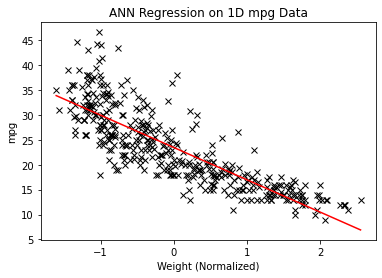

In [80]:
    n = len(X)
    #Plot the data and best fit line
    tt = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), n)  #The x coordinate of the line
    bf_line = w[0]+w[1]*tt  # y coordinate of the line

    plt.plot(X[:, 1], Y, 'kx', tt, bf_line, 'r-')
    plt.xlabel('Weight (Normalized)')
    plt.ylabel('mpg')
    plt.title('ANN Regression on 1D mpg Data')

    plt.savefig('mpg.png')

    plt.show()

In [0]:
#NOTE THAT W[0] IS THE INTERCEPT AND W[!] IS THE SLOPE
#IT IS SIMILAR TO THE LINEAR REGRESSION OUTPUT USING SCIKIT LEARN SHOWN BELOW


In [21]:
rmse = 0

for i in range(n):
    y_pred = w[0]+w[1]*tt[i]
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse / n)
print(rmse)

14.225336010021339


In [22]:
y_mean = np.mean(Y)
sumofsquares = 0
sumofresiduals = 0
for i in range(n):
    y_pred = w[0]+w[1]*tt[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2

score = 1 - (sumofresiduals / sumofsquares)
print(score)


-2.3303335199436064


In [23]:
#LINEAR REGRESSION USING SKLEARN

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.6926304331206254
intercept: 23.445918367346938
slope: [ 0.         -6.48738174]


In [0]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)


In [25]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X,Y)

print(np.sqrt(mse))
print(r2_score)

4.321645126270701
0.6926304331206254


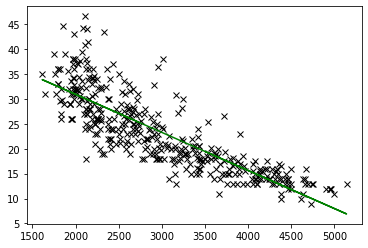

In [81]:
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(weight,Y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(weight)

#plot line
plt.plot(weight,Y, 'kx')
plt.plot(weight,line1, c = 'g')
plt.show()

In [0]:
line2 = np.full(392,[Y.mean()])


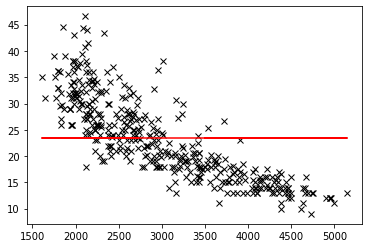

In [82]:
plt.plot(weight,Y, 'kx')
plt.plot(weight,line2, c = 'r')
plt.show()

In [53]:
differences_line1 = linefitline(weight)-Y
line1sum = 0
for i in differences_line1:
    line1sum = line1sum + (i*i)
line2sum

7321.2337061883645

In [60]:
differences_line2 = line2 - Y
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
line2sum

23818.993469387744

In [0]:
difference = line2sum - line1sum

In [65]:
r2val = difference/line2sum
r2val

0.6926304331206252

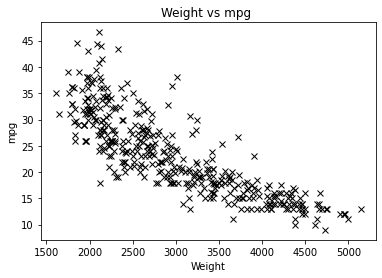

In [84]:
    plt.plot(weight, Y,'kx' )
    plt.xlabel('Weight')
    plt.ylabel('mpg')
    plt.title('Weight vs mpg ')

    plt.savefig('mpg.png')

    plt.show()